In [56]:
#Using Spotipy, a lightweight Python library for the Spotify Web API. Guide at link below
#https://spotipy.readthedocs.io/en/latest/#
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import spotipy, sys, csv
import pprint as pp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials

#Load Application ID and API Key for Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id='0de0796ce8d6430d9896525ccb8c845d',
                                                      client_secret='4b1c63bc8de34e7a9cc75b105f3c3875')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [12]:
#Read in csv of Singles and convert to DataFrame
top100singles = pd.read_csv('top100singles.csv')
list_of_dicts = []

#Loop Through all Singles in top100 singles csv
for index,row in top100singles.iterrows():
    
    title_and_artist = row['Single'] + ' ' + row['Artist']

    #Make API Call using search method, querying for "Title, Artist"
    #Limit to just the top response
    results = spotify.search(q=title_and_artist, type='track',limit=1)

    #temporary dictionary to store all of the track details
    temp = {}
    temp['name'] = results['tracks']['items'][0]['name']
    temp['popularity'] = results['tracks']['items'][0]['popularity']

    #if there are multiple artist on album, store as one value separated by commas
    multi_Artist = False
    for j in range(len(results['tracks']['items'][0]['artists'])):
        if multi_Artist == False:
            temp['artists'] = results['tracks']['items'][0]['artists'][j]['name']
            multi_Artist = True
        else:
            temp['artists'] = temp['artists'] + ', ' + results['tracks']['items'][0]['artists'][j]['name']

    list_of_dicts.append(temp)

In [13]:
#convert list of dictionaries to DataFrame
df = pd.DataFrame(list_of_dicts)
df.columns = ['Artist(s)', 'Title (Spotify)','Popularity']
df.head()

,Artist(s),Title (Spotify),Popularity
0,"Bing Crosby, Ken Darby Singers, John Scott Tro...",White Christmas,72
1,Elton John,Something About The Way You Look Tonight - Edi...,60
2,Mungo Jerry,In the Summertime,67
3,Bing Crosby,Silent Night,47
4,Bill Haley & His Comets,(We're Gonna) Rock Around The Clock,61


In [101]:
#concatenate results, and start index at 1
wiki_and_spotify = pd.concat([top100singles,df],axis=1)
wiki_and_spotify.index += 1
wiki_and_spotify = wiki_and_spotify[['Artist','Single','Release Year','Sales (in millions)','Popularity']]
wiki_and_spotify.head()

,Artist,Single,Release Year,Sales (in millions),Popularity
1,Bing Crosby,White Christmas,1942,50.0,72
2,Elton John,Candle in the Wind 1997 / Something About the ...,1997,33.0,60
3,Mungo Jerry,In the Summertime,1970,30.0,67
4,Bing Crosby,Silent Night,1935,30.0,47
5,Bill Haley & His Comets,Rock Around the Clock,1954,25.0,61


In [104]:
#output sinlges joined results to csv
wiki_and_spotify.to_csv('top100_singles_output.csv',index=False)

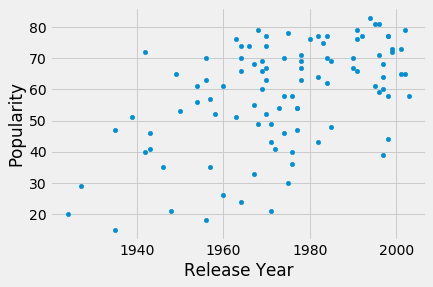

In [28]:
#plot Popularity against release year
wiki_and_spotify.reset_index().plot(x='Release Year',y='Popularity',kind='scatter')
plt.show()

In [ ]:
#Read in csv of Artists and convert to DataFrame
top100artists = pd.read_csv('top100artists.csv')
list_of_dicts = []
count = 0

#Loop Through all Artist in top100 artist csv
for index,row in top100artists.iterrows():
    artist = row['Artist']
    results = spotify.search(q=artist, type='artist',limit=1)
    
    #store name and popularity in dictionary
    temp = {}
    temp['name'] = results['artists']['items'][0]['name']
    temp['popularity'] = results['artists']['items'][0]['popularity']

    list_of_dicts.append(temp)

In [ ]:
#convert list of dictionaries to DataFrame
top100_artists_df = pd.DataFrame(list_of_dicts)
top100_artists_df

In [102]:
#join with original csv and reformat
top100_artists_joined = pd.concat([top100_artists_df,top100artists],axis=1)
top100_artists_joined.index+=1
top100_artists_joined = top100_artists_joined[['Artist','Sales','popularity','Country','Formation','End','Genre']]
top100_artists_joined.head()

,Artist,Sales,popularity,Country,Formation,End,Genre
1,The Beatles,600,90,United Kingdom,1960,1970,Rock
2,Elvis Presley,600,81,United States,1954,1977,Rock and roll
3,Michael Jackson,350,85,United States,1964,2009,Pop
4,Elton John,300,85,United Kingdom,1964,2019,Pop
5,Madonna,300,80,United States,1979,2019,Pop


In [ ]:
for i in range(1,top100_artists_joined['Genre'].count()+1):
    genre = top100_artists_joined['Genre'][i].lower()
    if 'alter' in genre:
        top100_artists_joined['Genre'][i] = 'Alt Rock'
    elif 'country' in genre:
        top100_artists_joined['Genre'][i] = 'Country'
    elif 'folk' in genre:
        top100_artists_joined['Genre'][i] = 'Folk'
    elif 'funk' in genre:
        top100_artists_joined['Genre'][i] = 'Funk'
    elif ('hard' in genre or 'metal' in genre):
        top100_artists_joined['Genre'][i] = 'Hard Rock'
    elif 'hip' in genre:
        top100_artists_joined['Genre'][i] = 'Hip-Hop'
    elif 'latin' in genre:
        top100_artists_joined['Genre'][i] = 'Latin'
    elif 'pop' in genre:
        top100_artists_joined['Genre'][i] = 'Pop'
    elif 'r&b' in genre:
        top100_artists_joined['Genre'][i] = 'R&B'
    elif 'rock' in genre:
        top100_artists_joined['Genre'][i] = 'Rock'
        

In [130]:
top100_artists_joined.head()

,Artist,Sales,popularity,Country,Formation,End,Genre
1,The Beatles,600,90,United Kingdom,1960,1970,Rock
2,Elvis Presley,600,81,United States,1954,1977,Rock
3,Michael Jackson,350,85,United States,1964,2009,Pop
4,Elton John,300,85,United Kingdom,1964,2019,Pop
5,Madonna,300,80,United States,1979,2019,Pop


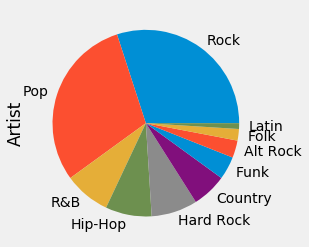

In [149]:
top100_artists_joined.groupby(['Genre']).count()['Artist'].sort_values(ascending=False).plot(kind='pie')
plt.show()

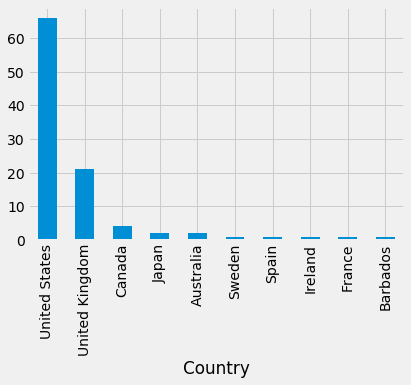

In [151]:
top100_artists_joined.groupby(['Country']).count()['Artist'].sort_values(ascending=False).plot(kind='bar')
plt.show()

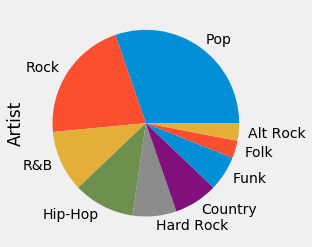

In [157]:
top100_artists_joined.loc[top100_artists_joined['Country']=='United States'].groupby(['Genre']).count()['Artist'].sort_values(ascending=False).plot(kind='pie')
plt.show()

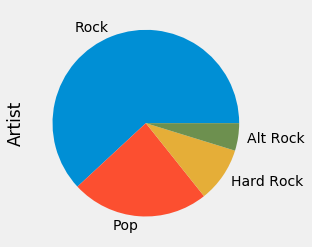

In [158]:
top100_artists_joined.loc[top100_artists_joined['Country']=='United Kingdom'].groupby(['Genre']).count()['Artist'].sort_values(ascending=False).plot(kind='pie')
plt.show()

In [129]:
#Export to csv
top100_artists_joined.to_csv('top100_artist_output.csv',index=False)